<h2 align="center">Лабораторна робота №1</h2>
<p style="margin-left: 50px"><i><b>Тема роботи:</b></i> "Геометричні перетворення координат на площині"</br>
<i><b>Мета роботи:</b></i> опанування методи елементарних перетворень на площині з використанням лінійної алгебри й афнних перетворень, навчитися перетворювати</p>

<h2 align="center">Завдання до лабораторної роботи</h2>
<ol>
    <li>Ознайомитись з теоретичними відомостями до лабораторної роботи. Дослідити кожне перетворення (перетворення, масштабування, поворот, відображення тощо) та їхні комбінації на площину.</li>
    <li>Задати вершини довільного опуклого 8-кутника на площині. Зменшити його в 1.5 рази.</li>
    <li>Отриманий результат з поперденього пункту симетрично відобразити відносно початку координат.</li>
    <li>Задати похилу пряму двома точками на площині. Симетрично відобразити відносно початку координат.</li>
    <li>Розробити програмне забезпечення (середовище розробки та мова програмування за вибором студента) для виконання пунктів 2-4. Результат виконання кожного пункту показати в окремому графічному вікні.</li>
    <li>Виконати пункти 2-4 для одного будь-якого графічного об'єкту, який подано в xlsx-фійлі.</li>
</ol>

<h2 align="center">Виконання лабораторної роботи</h2>

<h5>Завдання 2-4 для опуклого 8-кутника.</h5>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [17]:
r = np.array([5, 0])
hexagon = np.ndarray((8, 3))

# Генерація координат для 8-кутника
for i in range(8):
    fi = np.random.choice(np.linspace(1.8*np.pi/8, 2*np.pi/8, 1000))
    hexagon[i] = np.append(r, 1)
    m_angel = np.array(([np.cos(fi), -np.sin(fi)], [np.sin(fi), np.cos(fi)]))
    r = r.dot(m_angel)    


# Функція побудови замкненої фігури
def plot_fig(array, name="", plt=plt):
    plt.plot(np.append(array[..., 0], array[0, 0]), np.append(array[..., 1], array[0, 1]), label=name)


# Функція, що повертає матрицю пороту із вказаним аргументом
def mat_turn(alpha):
    return np.array([[np.cos(alpha), -np.sin(alpha), 0], [np.sin(alpha), np.cos(alpha), 0], [0, 0, 1]])


# Функція, що повертає матрицю зміщення із вказаними координатами
def mat_move(a, b):
    return np.array([[1, 0, a], [0, 1, b], [0, 0, 1]])

# Рандомне зміщення 8-кутника від центру
r_move = np.array([np.random.choice(np.linspace(-5, 5, 100)), np.random.choice(np.linspace(-5, 5, 100))])
hexagon = np.inner(hexagon, mat_move(r_move[0], 
                                     r_move[1]))

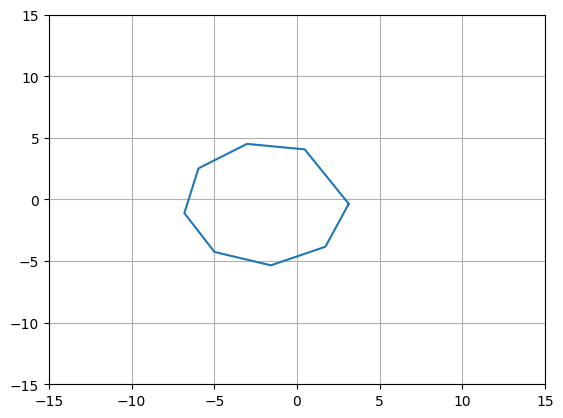

In [18]:
plot_fig(hexagon)

plt.xlim(-15, 15), plt.ylim(-15, 15)
plt.grid()
plt.show()

Завдання №2 (Зменшення фігури в 1,5 рази)

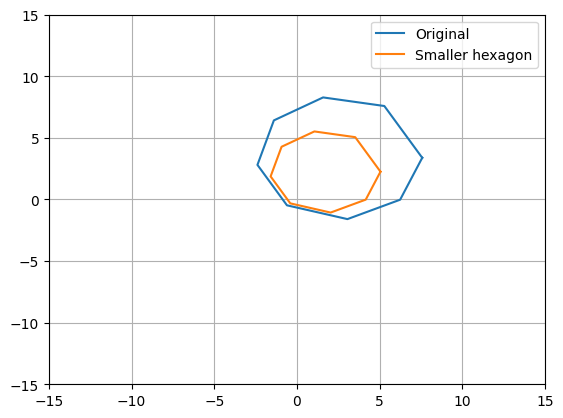

In [4]:
mat_scale = np.array([[2/3, 0, 0], [0, 2/3, 0], [0, 0, 1]])
hexagon_scale = np.inner(hexagon, mat_scale)

plot_fig(hexagon, "Original")
plot_fig(hexagon_scale, "Smaller hexagon")
plt.legend()
plt.xlim(-15, 15), plt.ylim(-15, 15)
plt.grid()
plt.show()

Завдання №3 (Симетрія відносно початку координат)

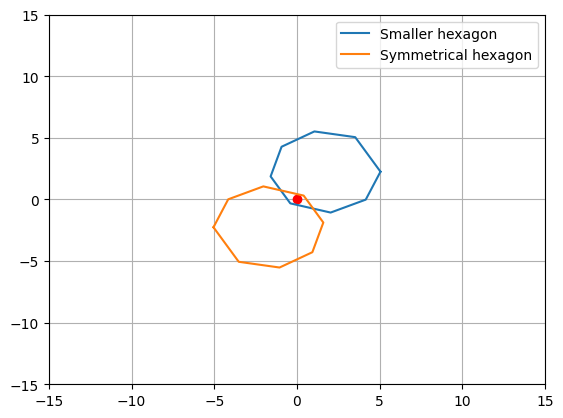

In [5]:
mat_symmetry = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
hexagon_symmetry = np.inner(hexagon_scale, mat_symmetry)

plt.plot([0], [0], color="r", marker="o")
plot_fig(hexagon_scale, "Smaller hexagon")
plot_fig(hexagon_symmetry, "Symmetrical hexagon")
plt.legend()
plt.xlim(-15, 15), plt.ylim(-15, 15)
plt.grid()
plt.show()

Завдання №4

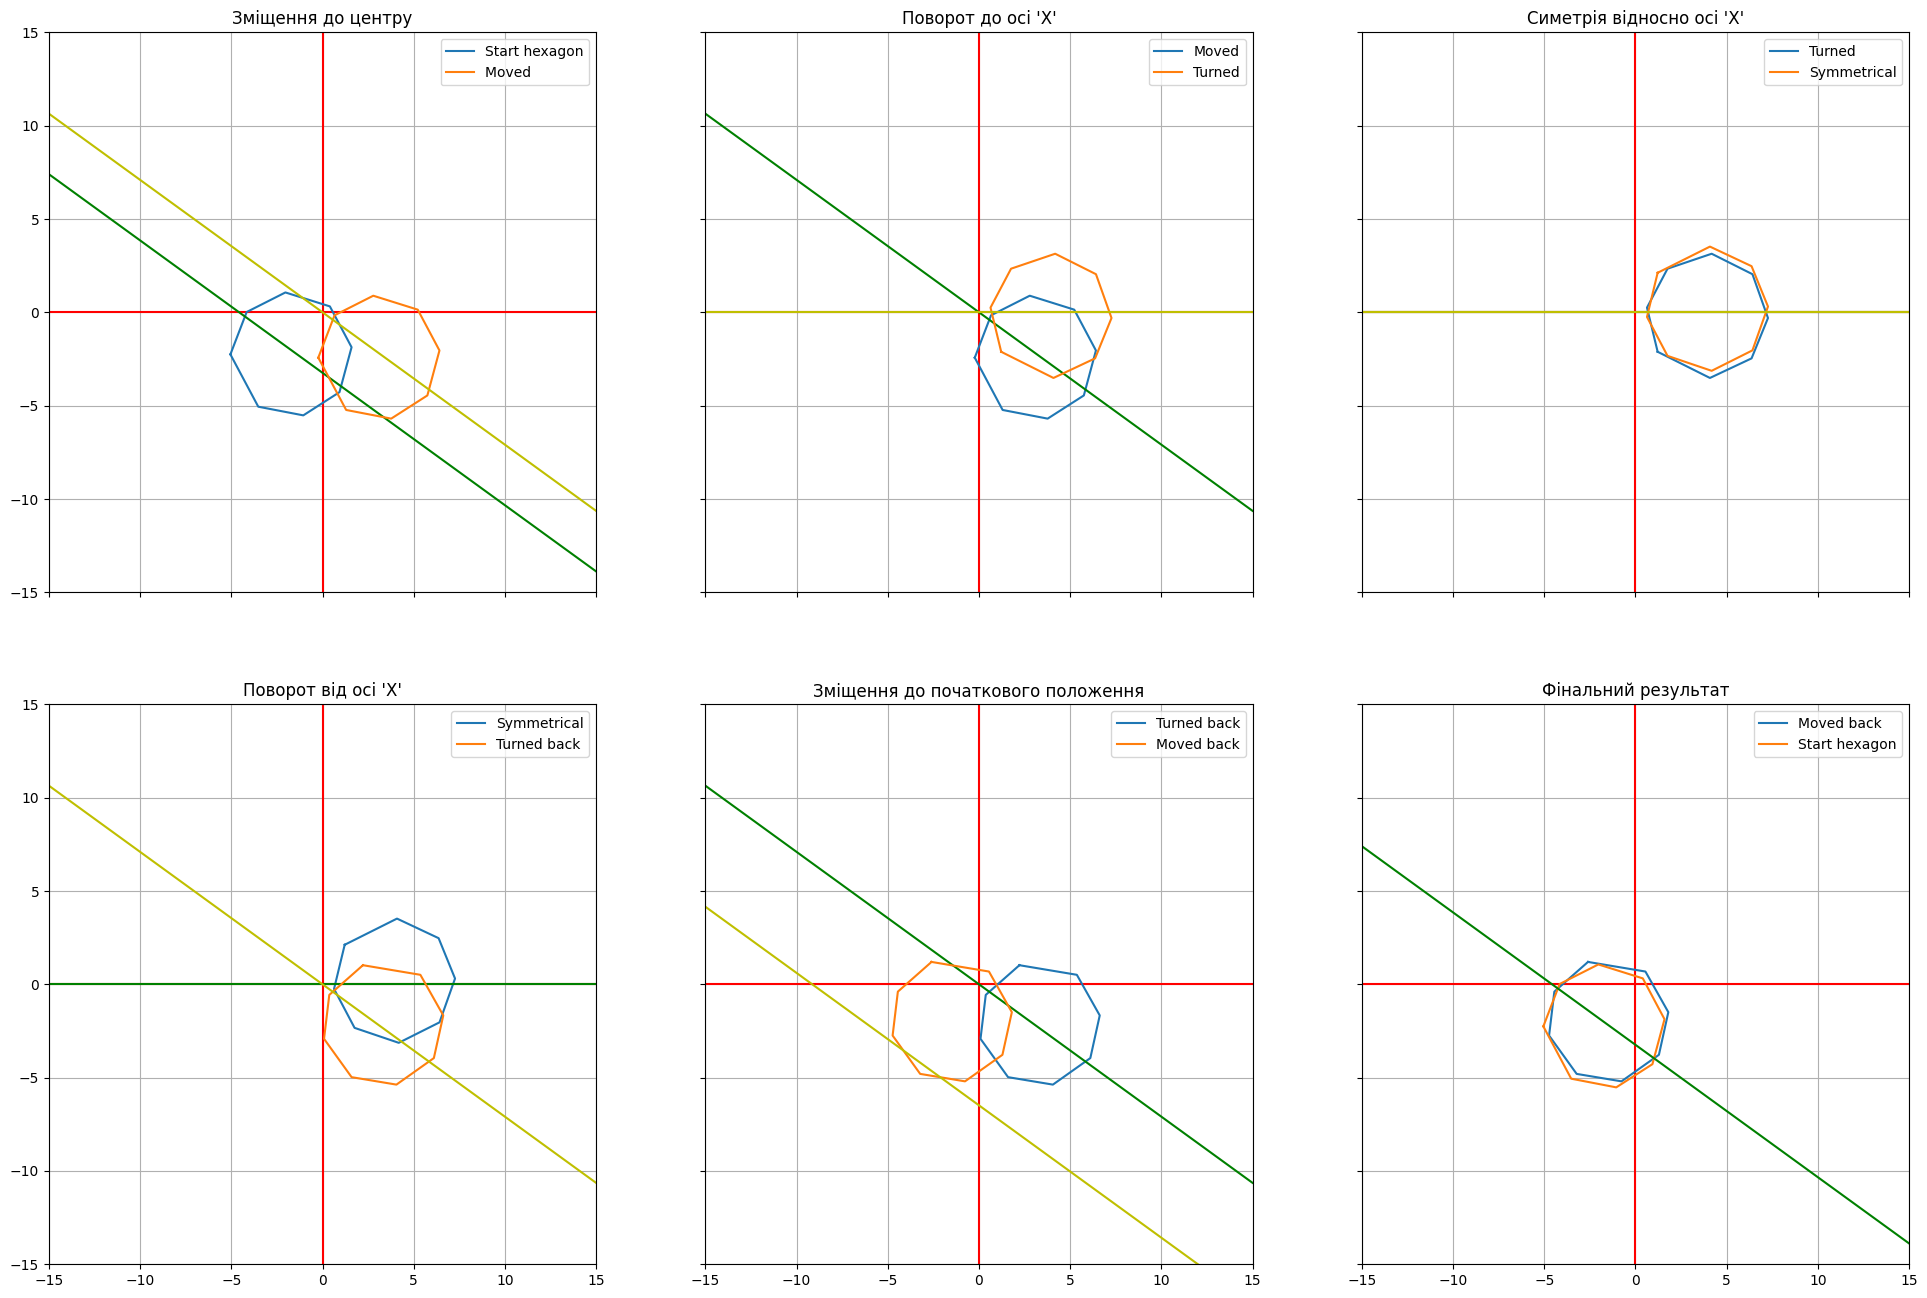

Ah shit, here we go again.


In [6]:
line_dots = np.array([[np.random.choice(np.linspace(-5, 5, 1000)), np.random.choice(np.linspace(-5, 5, 1000)), 1],
                      [np.random.choice(np.linspace(-5, 5, 1000)), np.random.choice(np.linspace(-5, 5, 1000)), 1]])


dot_h = line_dots[1] - line_dots[0]
alpha = np.arctan(dot_h[1]/dot_h[0])
mat_sym = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(24, 16), sharex=True, sharey=True)

for i in (ax1, ax2, ax3, ax4, ax5, ax6):
    i.axline((0, 0), (0, 1), color='r')
    i.axline((0, 0), (1, 0), color='r')
    
plot_fig(hexagon_symmetry, "Start hexagon", ax1)
ax1.axline(line_dots[0][:2], line_dots[1][:2], color="g")

hexagon_new = np.inner(hexagon_symmetry, mat_move(-line_dots[0][0], -line_dots[0][1]))
line_new = np.inner( line_dots, mat_move(-line_dots[0][0], -line_dots[0][1]) )

plot_fig(hexagon_new, "Moved ", ax1)
ax1.axline(line_new[0][:2], line_new[1][:2], color="y")

plot_fig(hexagon_new, "Moved", ax2)
ax2.axline(line_new[0][:2], line_new[1][:2], color="g")

hexagon_new = np.inner(hexagon_new, mat_turn(-alpha))
line_new = np.inner(line_new, mat_turn(-alpha))

plot_fig(hexagon_new, "Turned", ax2)
ax2.axline(line_new[0][:2], line_new[1][:2], color="y")

plot_fig(hexagon_new, "Turned", ax3)
ax3.axline(line_new[0][:2], line_new[1][:2], color="g")

hexagon_new = np.inner(hexagon_new, mat_sym)
line_new = np.inner(line_new, mat_sym)

plot_fig(hexagon_new, "Symmetrical", ax3)
ax3.axline(line_new[0][:2], line_new[1][:2], color="y")

plot_fig(hexagon_new, "Symmetrical", ax4)
ax4.axline(line_new[0][:2], line_new[1][:2], color="g")

hexagon_new = np.inner(hexagon_new, mat_turn(alpha))
line_new = np.inner(line_new, mat_turn(alpha))

plot_fig(hexagon_new, "Turned back", ax4)
ax4.axline(line_new[0][:2], line_new[1][:2], color="y")

plot_fig(hexagon_new, "Turned back", ax5)
ax5.axline(line_new[0][:2], line_new[1][:2], color="g")

hexagon_new = np.inner(hexagon_new, mat_move(line_dots[0][0], line_dots[0][1]))
line_new = np.inner( line_dots, mat_move(line_dots[0][0], line_dots[0][1]) )

plot_fig(hexagon_new, "Moved back", ax5)
ax5.axline(line_new[0][:2], line_new[1][:2], color="y")

plot_fig(hexagon_new, "Moved back", ax6)
plot_fig(hexagon_symmetry, "Start hexagon", ax6)
ax6.axline(line_dots[0][:2], line_dots[1][:2], color="g")

plt.xlim(-15, 15), plt.ylim(-15, 15)
for i in ((ax1, "Зміщення до центру"), (ax2, "Поворот до осі 'X'"), (ax3, "Симетрія відносно осі 'X'"), (ax4, "Поворот від осі 'X'"), (ax5, "Зміщення до початкового положення"), (ax6, "Фінальний результат")):
    i[0].legend()
    i[0].grid()
    i[0].set_title(i[1])
plt.show()

print("Ah shit, here we go again.")

<h5>Завдання 2-4 для фігури варіанту №1.</h5>

In [7]:
import pandas as pd

figure = pd.read_csv("Var_01.csv", decimal=",", dtype=np.float64)
display(figure.head())
figure_np = figure.to_numpy()
figure_np = np.column_stack( ( figure_np, np.ones((612, 1)) ) )
figure_np

C:\Users\berku\AppData\Local\Temp\ipykernel_15200\2124620350.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X,Y
0,112.219,100.749
1,111.713,101.474
2,111.092,102.250
3,110.511,102.887
4,109.896,103.489


array([[112.219, 100.749,   1.   ],
       [111.713, 101.474,   1.   ],
       [111.092, 102.25 ,   1.   ],
       ...,
       [114.03 , 101.524,   1.   ],
       [114.03 , 101.6  ,   1.   ],
       [121.97 , 101.6  ,   1.   ]])

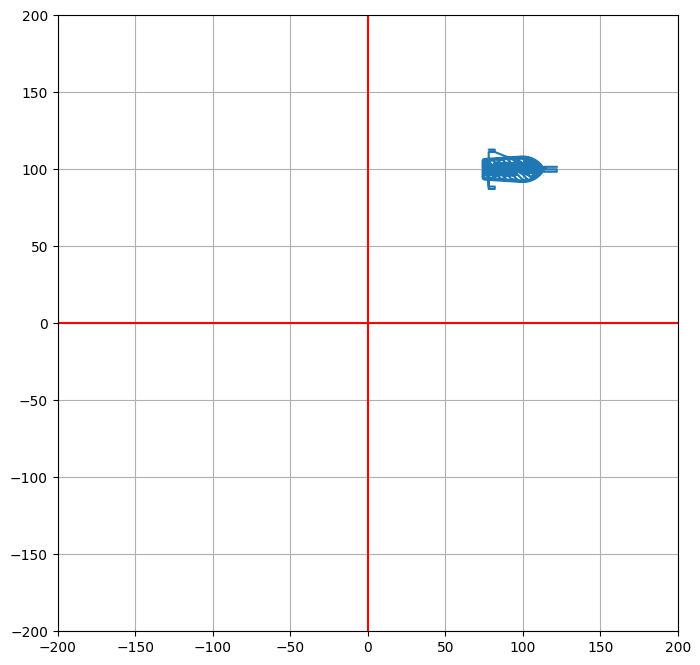

In [8]:
plt.figure(figsize=(8, 8))

plt.plot(figure_np[..., 0], figure_np[..., 1])
plt.xlim(-200, 200), plt.ylim(-200, 200)
plt.axline((0, 0), (0, 1), color='r')
plt.axline((0, 0), (1, 0), color='r')
plt.grid()

Завдання №2 (Зменшити в 1,5 рази)

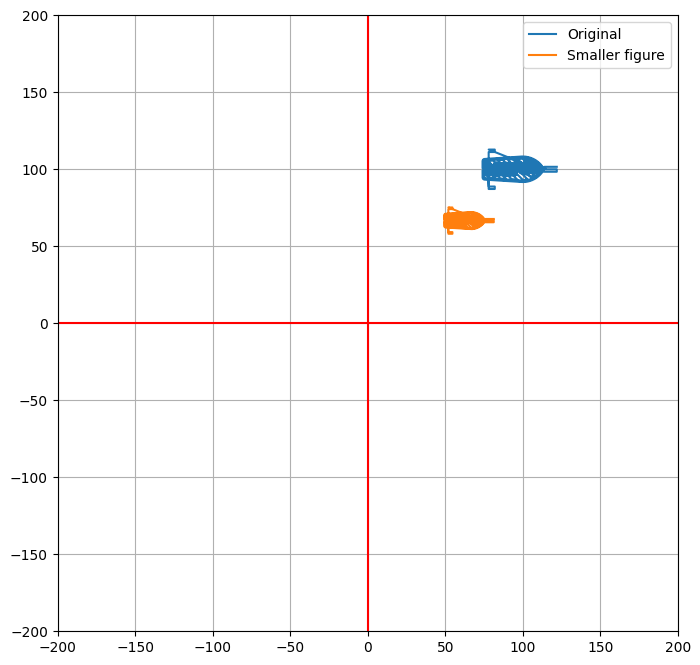

In [9]:
plt.figure(figsize=(8, 8))
figure_scale = np.inner(figure_np, mat_scale)

plt.plot(figure_np[..., 0], figure_np[..., 1], label="Original")
plt.plot(figure_scale[..., 0], figure_scale[..., 1], label="Smaller figure")
plt.legend()
plt.xlim(-200, 200), plt.ylim(-200, 200)
plt.axline((0, 0), (0, 1), color='r')
plt.axline((0, 0), (1, 0), color='r')
plt.grid()

Завдання №3 (Симетрія відносно початку координат)

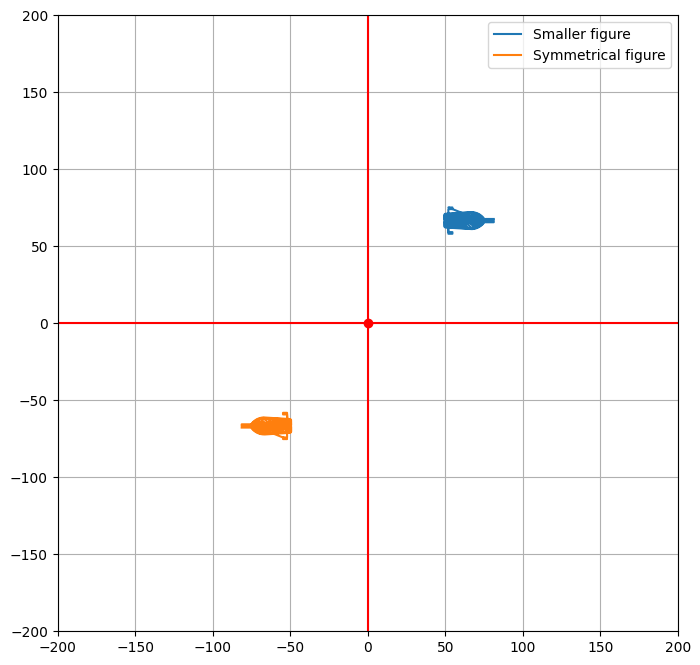

In [10]:
plt.figure(figsize=(8, 8))
figure_symmetry = np.inner(figure_scale, mat_symmetry)

plt.plot([0], [0], color="r", marker="o")
plt.plot(figure_scale[..., 0], figure_scale[..., 1], label="Smaller figure")
plt.plot(figure_symmetry[..., 0], figure_symmetry[..., 1], label="Symmetrical figure")
plt.legend()
plt.xlim(-200, 200), plt.ylim(-200, 200)
plt.axline((0, 0), (0, 1), color='r')
plt.axline((0, 0), (1, 0), color='r')
plt.grid()

Завдання №4

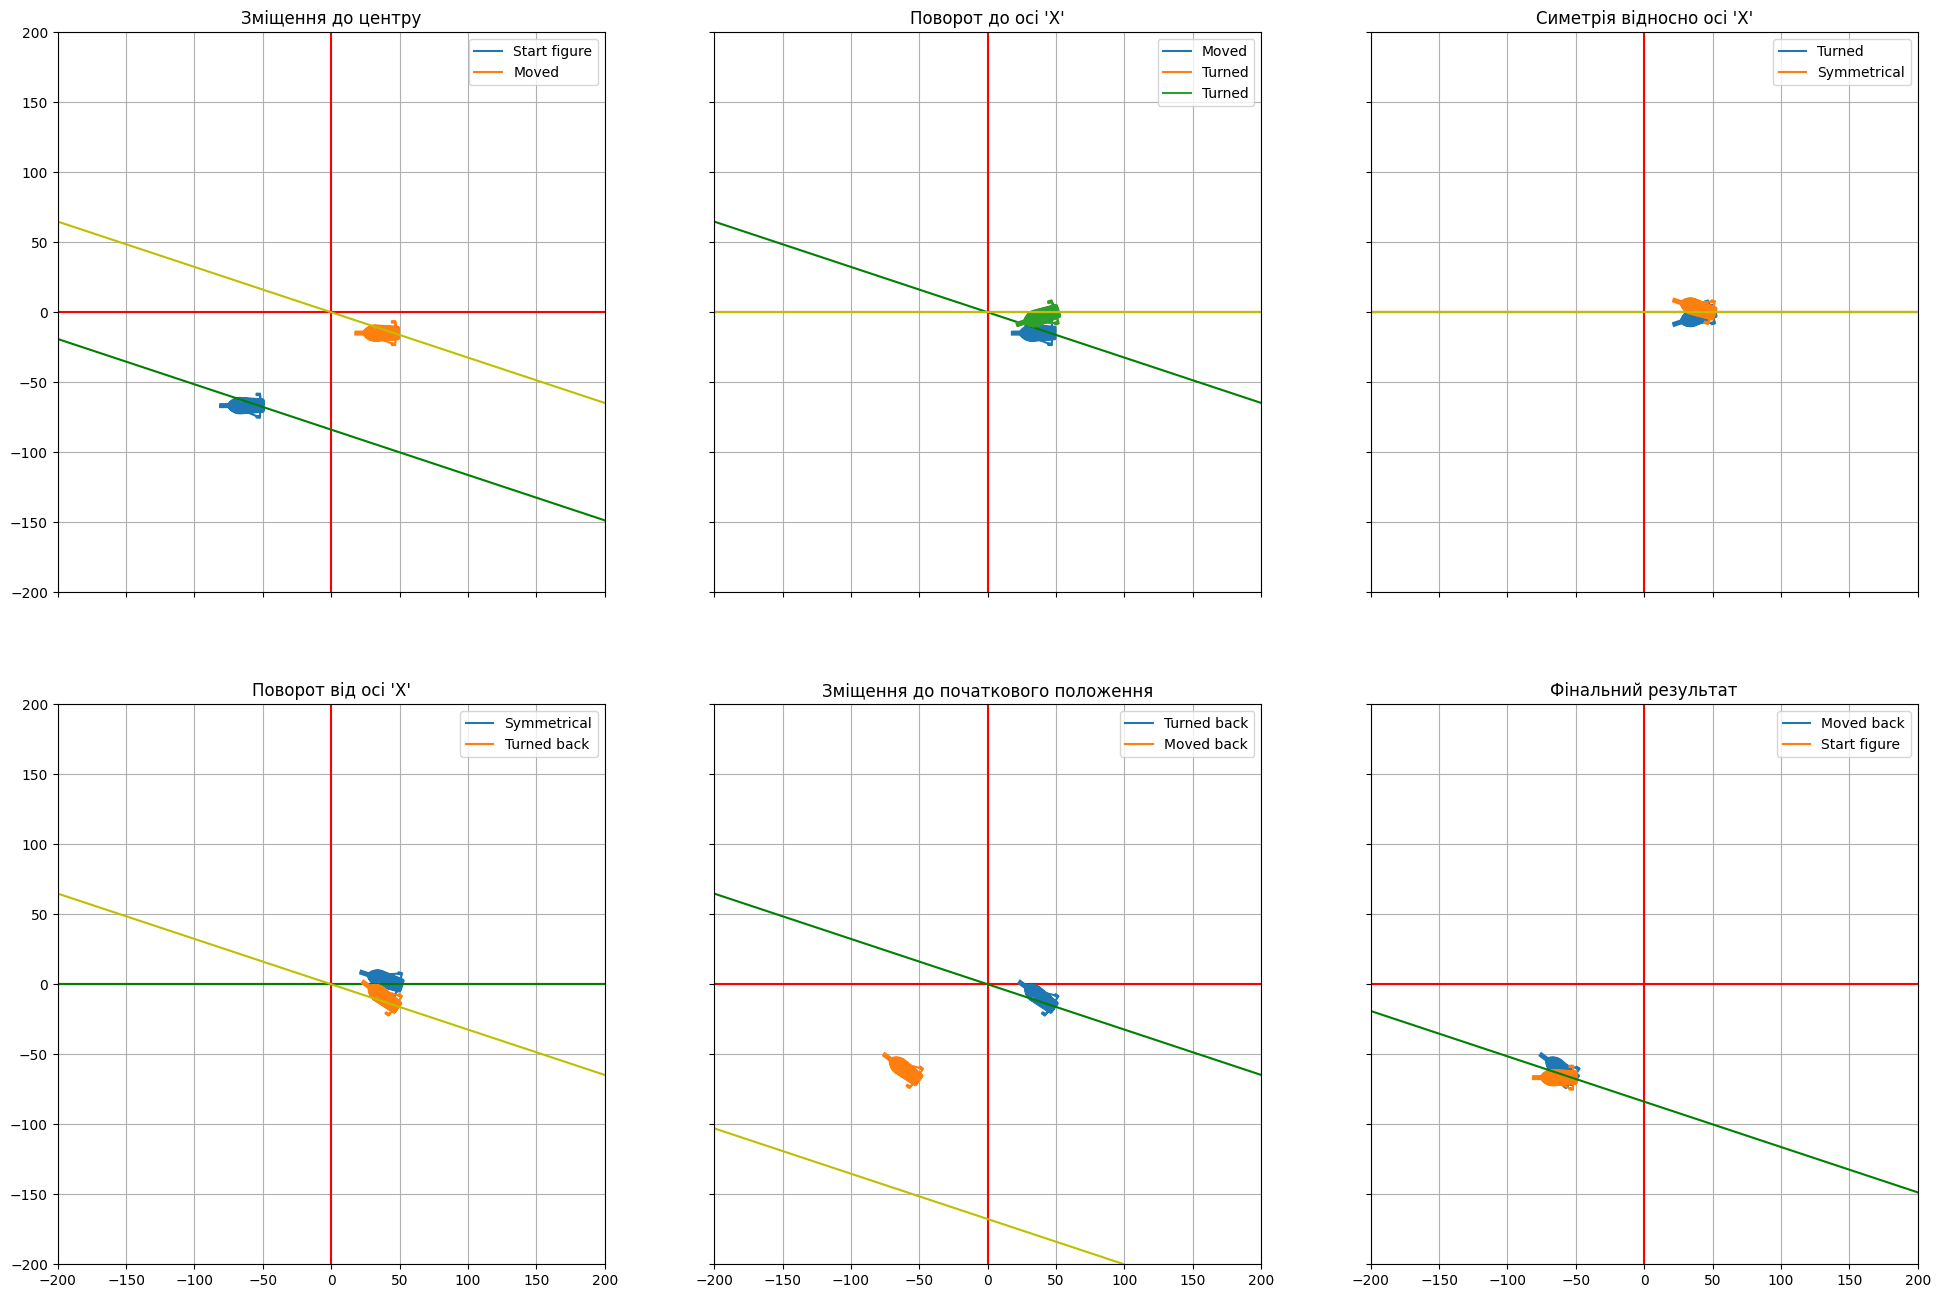

In [14]:
line_dots = np.array([[np.random.choice(np.linspace(-150, 150, 1000)), np.random.choice(np.linspace(-150, 150, 1000)), 1],
                      [np.random.choice(np.linspace(-150, 150, 1000)), np.random.choice(np.linspace(-150, 150, 1000)), 1]])


dot_h = line_dots[1] - line_dots[0]
alpha = np.arctan(dot_h[1]/dot_h[0])
mat_sym = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(24, 16), sharex=True, sharey=True)

for i in (ax1, ax2, ax3, ax4, ax5, ax6):
    i.axline((0, 0), (0, 1), color='r')
    i.axline((0, 0), (1, 0), color='r')
    
ax1.plot(figure_symmetry[..., 0], figure_symmetry[..., 1], label="Start figure")
ax1.axline(line_dots[0][:2], line_dots[1][:2], color="g")

figure_new = np.inner(figure_symmetry, mat_move(-line_dots[0][0], -line_dots[0][1]))
line_new = np.inner( line_dots, mat_move(-line_dots[0][0], -line_dots[0][1]) )

ax1.plot(figure_new[..., 0], figure_new[..., 1], label="Moved")
ax1.axline(line_new[0][:2], line_new[1][:2], color="y")

ax2.plot(figure_new[..., 0], figure_new[..., 1], label="Moved")
ax2.axline(line_new[0][:2], line_new[1][:2], color="g")

figure_new = np.inner(figure_new, mat_turn(-alpha))
line_new = np.inner(line_new, mat_turn(-alpha))


ax2.plot(figure_new[..., 0], figure_new[..., 1], label="Turned")
plot_fig(figure_new, "Turned", ax2)
ax2.axline(line_new[0][:2], line_new[1][:2], color="y")

ax3.plot(figure_new[..., 0], figure_new[..., 1], label="Turned")
ax3.axline(line_new[0][:2], line_new[1][:2], color="g")

figure_new = np.inner(figure_new, mat_sym)
line_new = np.inner(line_new, mat_sym)

ax3.plot(figure_new[..., 0], figure_new[..., 1], label="Symmetrical")
ax3.axline(line_new[0][:2], line_new[1][:2], color="y")

ax4.plot(figure_new[..., 0], figure_new[..., 1], label="Symmetrical")
ax4.axline(line_new[0][:2], line_new[1][:2], color="g")

figure_new = np.inner(figure_new, mat_turn(alpha))
line_new = np.inner(line_new, mat_turn(alpha))

ax4.plot(figure_new[..., 0], figure_new[..., 1], label="Turned back")
ax4.axline(line_new[0][:2], line_new[1][:2], color="y")

ax5.plot(figure_new[..., 0], figure_new[..., 1], label="Turned back")
ax5.axline(line_new[0][:2], line_new[1][:2], color="g")

figure_new = np.inner(figure_new, mat_move(line_dots[0][0], line_dots[0][1]))
line_new = np.inner( line_dots, mat_move(line_dots[0][0], line_dots[0][1]) )

ax5.plot(figure_new[..., 0], figure_new[..., 1], label="Moved back")
ax5.axline(line_new[0][:2], line_new[1][:2], color="y")

ax6.plot(figure_new[..., 0], figure_new[..., 1], label="Moved back")
ax6.plot(figure_symmetry[..., 0], figure_symmetry[..., 1], label="Start figure")
ax6.axline(line_dots[0][:2], line_dots[1][:2], color="g")

plt.xlim(-200, 200), plt.ylim(-200, 200)
for i in ((ax1, "Зміщення до центру"), (ax2, "Поворот до осі 'X'"), (ax3, "Симетрія відносно осі 'X'"), (ax4, "Поворот від осі 'X'"), (ax5, "Зміщення до початкового положення"), (ax6, "Фінальний результат")):
    i[0].legend()
    i[0].grid()
    i[0].set_title(i[1])
plt.show()